<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/03_Introduction_to_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional neural network and Computer Vision in tensorflow

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-17 11:05:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.128.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  94.6MB/s    in 1.1s    

2022-08-17 11:05:39 (94.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames,filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
len(os.listdir("pizza_steak/train/steak"))

750

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title('target class')
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


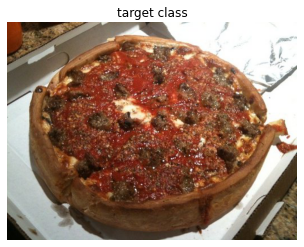

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[129,  36,   5],
        [130,  37,   6],
        [131,  38,   4],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [252, 252, 252]],

       [[129,  36,   5],
        [130,  37,   4],
        [132,  39,   5],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [252, 252, 252]],

       [[129,  36,   5],
        [131,  38,   5],
        [133,  40,   6],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[  4,   6,   1],
        [  3,   5,   0],
        [  3,   5,   0],
        ...,
        [ 66,  62,  33],
        [ 78,  75,  42],
        [ 95,  95,  61]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [ 78,  72,  46],
        [ 85,  81,  52],
        [ 94,  91,  60]],

       [[  4,   6,   1],
        [  3,   5,   0],
        [  2,   4,   0],
        ...,
        [ 69,  63,  3

In [11]:
img/255.

array([[[0.50588235, 0.14117647, 0.01960784],
        [0.50980392, 0.14509804, 0.02352941],
        [0.51372549, 0.14901961, 0.01568627],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.50588235, 0.14117647, 0.01960784],
        [0.50980392, 0.14509804, 0.01568627],
        [0.51764706, 0.15294118, 0.01960784],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.50588235, 0.14117647, 0.01960784],
        [0.51372549, 0.14901961, 0.01960784],
        [0.52156863, 0.15686275, 0.02352941],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       ...,

       [[0.01568627, 0.02352941, 0.00392157],
        [0.01176471, 0.01960784, 0.        ],
        [0.01176471, 0

# An end to end example

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = train_dir,
                                              target_size= (224,224),
                                              batch_size = 32,
                                              class_mode = "binary",
                                              seed= 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding= 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss ='binary_crossentropy',
                optimizer='Adam',
                metrics = ['Accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 319ms/step - loss: 0.8943 - Accuracy: 0.6053 - val_loss: 0.5273 - val_Accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 14s 308ms/step - loss: 1.4724 - Accuracy: 0.7347 - val_loss: 7.7049 - val_Accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 307ms/step - loss: 7.7125 - Accuracy: 0.5000 - val_loss: 7.7125 - val_Accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 307ms/step - loss: 7.7125 - Accuracy: 0.5000 - val_loss: 7.7125 - val_Accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 309ms/step - loss: 7.7125 - Accuracy: 0.5000 - val_loss: 7.7125 - val_Accuracy: 0.5000


In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 14s 294ms/step - loss: 0.6934 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 289ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 287ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 289ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics =['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 293ms/step - loss: 4.2677 - accuracy: 0.6433 - val_loss: 1.8453 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 13s 284ms/step - loss: 1.6326 - accuracy: 0.7020 - val_loss: 2.2871 - val_accuracy: 0.5187
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 1.2053 - accuracy: 0.7133 - val_loss: 0.9378 - val_accuracy: 0.7167
Epoch 4/5
47/47 [==============================] - 13s 286ms/step - loss: 0.9595 - accuracy: 0.7460 - val_loss: 0.3921 - val_accuracy: 0.8493
Epoch 5/5
47/47 [==============================] - 13s 284ms/step - loss: 0.6300 - accuracy: 0.7807 - val_loss: 0.3830 - val_accuracy: 0.8547


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


# Binary Classification : let's break it down

##1. Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


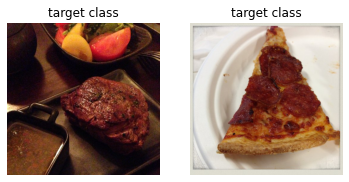

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

##2. Preprocessing the data(prepare it for model)

In [17]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

In [19]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = train_dir,
                                             target_size = (224,224),
                                             class_mode ='binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [20]:
images , labels = train_data.next()

In [21]:
len(images) , len(labels)

(32, 32)

In [22]:
len(train_data)

47

In [23]:
images[:2] , images[5].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [24]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

### Create a CNN model (start with a baseline)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding ='valid',
           activation ='relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])



### 4.fit the model

In [27]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 312ms/step - loss: 0.8449 - accuracy: 0.6540 - val_loss: 0.4635 - val_accuracy: 0.7993
Epoch 2/5
47/47 [==============================] - 14s 307ms/step - loss: 0.4529 - accuracy: 0.8067 - val_loss: 0.3201 - val_accuracy: 0.9073
Epoch 3/5
47/47 [==============================] - 14s 305ms/step - loss: 0.2831 - accuracy: 0.8960 - val_loss: 0.1885 - val_accuracy: 0.9627
Epoch 4/5
47/47 [==============================] - 14s 306ms/step - loss: 0.1673 - accuracy: 0.9420 - val_loss: 0.0986 - val_accuracy: 0.9820
Epoch 5/5
47/47 [==============================] - 14s 305ms/step - loss: 0.0743 - accuracy: 0.9827 - val_loss: 0.0381 - val_accuracy: 0.9980


###evaluate the model

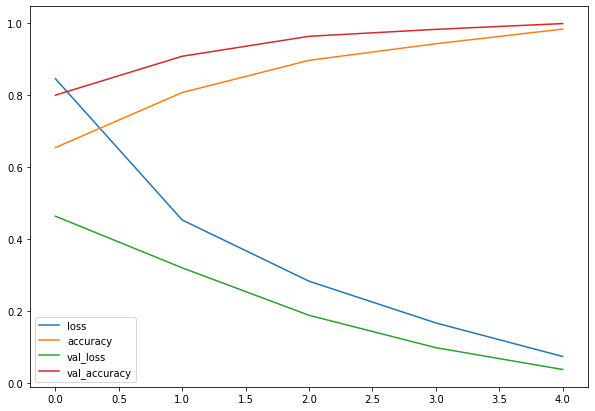

In [28]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [29]:
history_4.history['accuracy']

[0.6539999842643738,
 0.8066666722297668,
 0.8960000276565552,
 0.9419999718666077,
 0.9826666712760925]

In [30]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

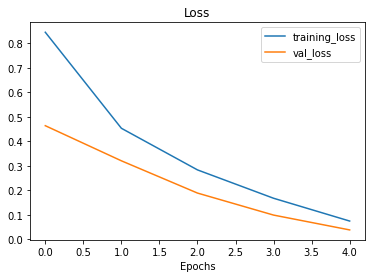

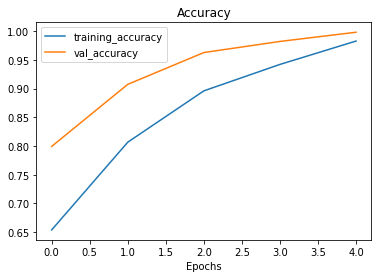

In [31]:
plot_loss_curves(history_4)

In [32]:
model_5 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ='sigmoid')
])

In [33]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics = ['accuracy'])

In [34]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 301ms/step - loss: 0.5974 - accuracy: 0.6807 - val_loss: 0.5022 - val_accuracy: 0.7567
Epoch 2/5
47/47 [==============================] - 14s 293ms/step - loss: 0.4622 - accuracy: 0.7873 - val_loss: 0.4145 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 14s 294ms/step - loss: 0.4170 - accuracy: 0.8213 - val_loss: 0.4475 - val_accuracy: 0.7987
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4098 - accuracy: 0.8160 - val_loss: 0.3777 - val_accuracy: 0.8313
Epoch 5/5
47/47 [==============================] - 14s 297ms/step - loss: 0.3796 - accuracy: 0.8367 - val_loss: 0.3797 - val_accuracy: 0.8367


In [35]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


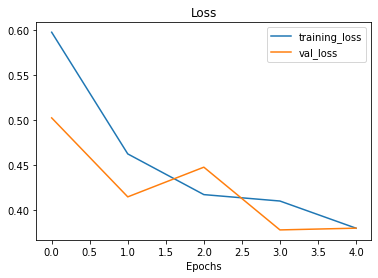

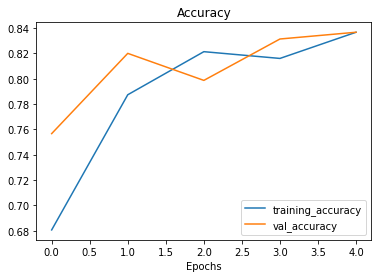

In [37]:
plot_loss_curves(history_5)

### finding Data Augmentation

In [38]:
train_datagen_augmented  = ImageDataGenerator(rescale= 1/255.,
                                               rotation_range= 0.2,
                                               shear_range = 0.2,
                                               zoom_range = 0.2,
                                               width_shift_range= 0.2,
                                               height_shift_range = 0.3,
                                               horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [39]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size= (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  shuffle = False)
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size  =32,
                                             class_mode  = 'binary')
                                             

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [40]:
images , labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing random number: 1


(-0.5, 223.5, 223.5, -0.5)

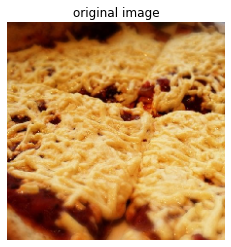

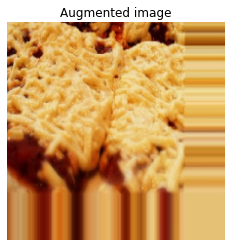

In [41]:
random_number = random.randint(0,32)
print(f'showing random number: {random_number}')
plt.imshow(images[random_number])
plt.title('original image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [42]:
model_6 = Sequential([
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation  = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 516ms/step - loss: 0.6958 - accuracy: 0.4380 - val_loss: 0.6901 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 46s 985ms/step - loss: 0.6939 - accuracy: 0.5060 - val_loss: 0.6900 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6893 - accuracy: 0.5360 - val_loss: 0.6728 - val_accuracy: 0.6280
Epoch 4/5
47/47 [==============================] - 33s 699ms/step - loss: 0.6789 - accuracy: 0.5273 - val_loss: 0.6390 - val_accuracy: 0.6140
Epoch 5/5
47/47 [==============================] - 24s 501ms/step - loss: 0.6524 - accuracy: 0.5960 - val_loss: 0.6021 - val_accuracy: 0.6240


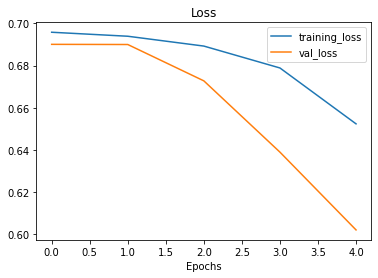

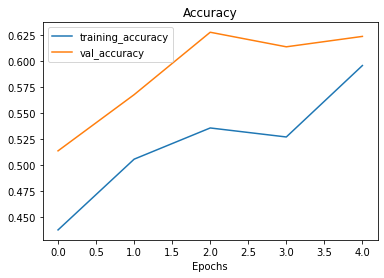

In [43]:
plot_loss_curves(history_6)

In [44]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [45]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6610 - accuracy: 0.5887 - val_loss: 0.5558 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5411 - accuracy: 0.7360 - val_loss: 0.5731 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5545 - accuracy: 0.7053 - val_loss: 0.3931 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5038 - accuracy: 0.7613 - val_loss: 0.3696 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4824 - accuracy: 0.7740 - val_loss: 0.3600 - val_accuracy: 0.8440


# Make prediction on our trained model with our custom data

In [46]:
print(class_names)

['pizza' 'steak']


In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2022-08-17 11:17:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-08-17 11:17:28 (95.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

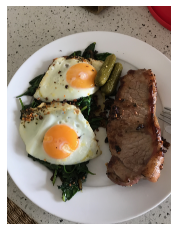

In [49]:
plt.imshow(steak)
plt.axis(False)

In [50]:
steak.shape

(4032, 3024, 3)

In [51]:
steak.shape

(4032, 3024, 3)

In [52]:
def load_and_prep_image(filename, img_shape= 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size= [img_shape,img_shape])
  img = img/255.
  return img

In [53]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [54]:
pred = model_7.predict(tf.expand_dims(steak,axis = 0))
pred

array([[0.66208065]], dtype=float32)

In [55]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [56]:
def pred_and_plot(model,filename,class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

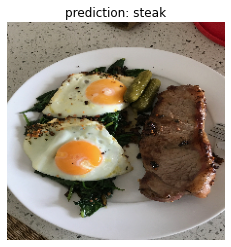

In [57]:
pred_and_plot(model_7, "03-steak.jpeg")

--2022-08-17 11:17:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-08-17 11:17:30 (115 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



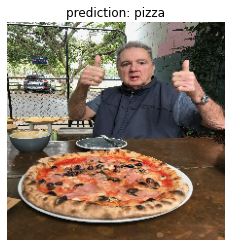

In [58]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi_class Classification 

## Import and become one with the data

In [59]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-17 11:17:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.128.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   104MB/s    in 5.0s    

2022-08-17 11:17:36 (99.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [60]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

there are 2 directories and 0 in 10_food_classes_all_data
there are 10 directories and 0 in 10_food_classes_all_data/test
there are 0 directories and 250 in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 in 10_food_classes_all_data/test/steak
there are 0 directories and 250 in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 in 10_food_classes_all_data/test/chicken_wings
there are 10 directories and 0 in 10_food_classes_all_data/train
there are 0 directories and 750 in 10_food_classes_all_data/train

In [61]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [62]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


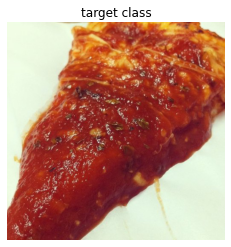

In [63]:
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create the model 

In [65]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten, Dense, Activation


model_8 = Sequential([
    Conv2D(10,3, input_shape = (224,224,3)),
    Activation(activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_8.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

### 4. Fit the model

In [66]:
history_8 = model_8.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 211ms/step - loss: 2.1686 - accuracy: 0.2040 - val_loss: 1.9889 - val_accuracy: 0.2928
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.8683 - accuracy: 0.3529 - val_loss: 1.9081 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 49s 207ms/step - loss: 1.4140 - accuracy: 0.5255 - val_loss: 2.0441 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 0.7080 - accuracy: 0.7737 - val_loss: 2.8913 - val_accuracy: 0.2948
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.2430 - accuracy: 0.9271 - val_loss: 4.2662 - val_accuracy: 0.2628


### 5. Evaluate the model

In [67]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 4.2662 - accuracy: 0.2628


[4.266193389892578, 0.262800008058548]

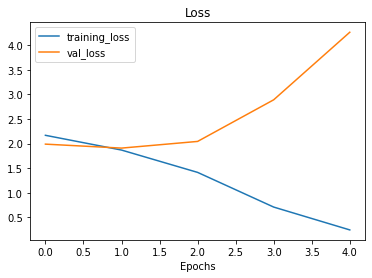

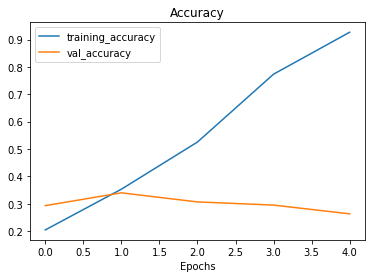

In [68]:
plot_loss_curves(history_8)

### adjust the hyperparameter(improve baseline score and reduce overfitting)

In [70]:
model_9 = Sequential([
    Conv2D(10,3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_9.compile(loss= 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.1728 - accuracy: 0.2121 - val_loss: 1.9764 - val_accuracy: 0.3148
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.8025 - accuracy: 0.3907 - val_loss: 1.9111 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 47s 200ms/step - loss: 1.3845 - accuracy: 0.5461 - val_loss: 2.0466 - val_accuracy: 0.3200
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 0.8441 - accuracy: 0.7460 - val_loss: 2.2878 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.4075 - accuracy: 0.8907 - val_loss: 2.8868 - val_accuracy: 0.2964


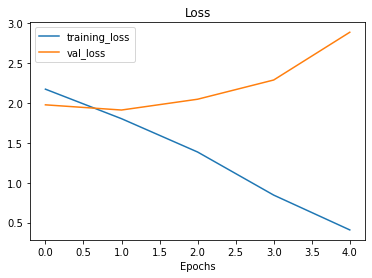

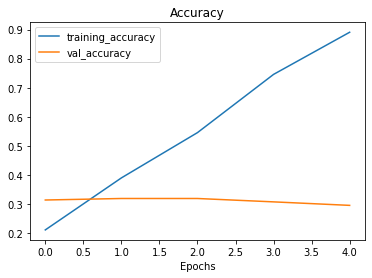

In [71]:
plot_loss_curves(history_9)

### Trying reducing overfitting with data augmentation

In [74]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip= True)
                                             

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [75]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss= 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = [ 'accuracy'])

In [78]:
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 123s 519ms/step - loss: 2.2207 - accuracy: 0.1739 - val_loss: 2.0037 - val_accuracy: 0.2860
Epoch 2/5
235/235 [==============================] - 118s 502ms/step - loss: 2.0593 - accuracy: 0.2713 - val_loss: 1.8801 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 142s 606ms/step - loss: 1.9763 - accuracy: 0.3057 - val_loss: 1.8138 - val_accuracy: 0.3800
Epoch 4/5
235/235 [==============================] - 139s 593ms/step - loss: 1.9545 - accuracy: 0.3213 - val_loss: 1.9021 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 118s 502ms/step - loss: 1.9297 - accuracy: 0.3331 - val_loss: 1.7760 - val_accuracy: 0.3860


In [79]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 144ms/step - loss: 1.7760 - accuracy: 0.3860


[1.7760339975357056, 0.38600000739097595]

In [80]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 4.2662 - accuracy: 0.2628


[4.266192436218262, 0.262800008058548]

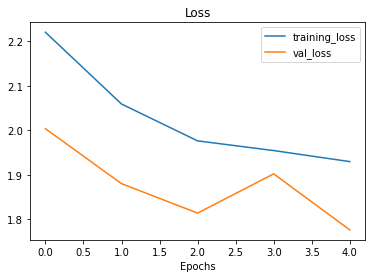

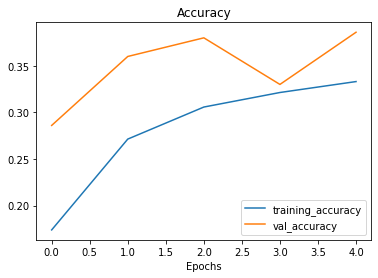

In [86]:
plot_loss_curves(history_10)

In [82]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-08-17 12:22:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2022-08-17 12:22:24 (123 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-08-17 12:22:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [89]:
def pred_and_plot(model,filename,class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0]) >1:
    pred_class = class_names[tf.argmax(pred[0])]

  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

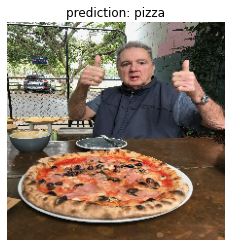

In [90]:
pred_and_plot(model = model_10,
              filename = "03-pizza-dad.jpeg")

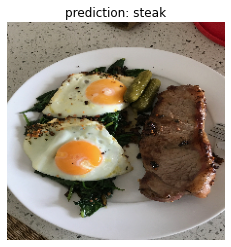

In [91]:
pred_and_plot(model = model_10,
              filename = "03-steak.jpeg")

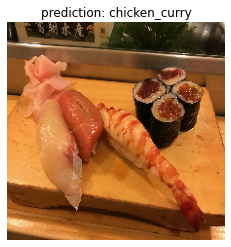

In [92]:
pred_and_plot(model = model_10,
              filename = "03-sushi.jpeg")

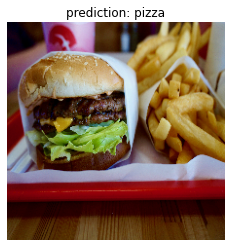

In [93]:
pred_and_plot(model = model_10,
              filename = "03-hamburger.jpeg")

### save and load model

In [94]:
model_10.save("saved_trained_model_10")

In [95]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 1.7760 - accuracy: 0.3860


[1.7760342359542847, 0.38600000739097595]